In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('dataset/covid19_global.csv', sep=';')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31360 entries, 0 to 31359
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime      31360 non-null  object 
 1   country       31360 non-null  object 
 2   country_code  31232 non-null  object 
 3   history       31360 non-null  float64
 4   latest        31360 non-null  int64  
 5   province      9472 non-null   object 
 6   lat           31360 non-null  float64
 7   long          31360 non-null  float64
 8   type          31360 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 2.2+ MB


In [4]:
data['history_log'] = data['history'].apply(lambda history: np.log(history))

Sorting dataframe by date

In [5]:
data = data.sort_values(by=['datetime']).reset_index(drop=True).copy()

In [6]:
data.head()

,datetime,country,country_code,history,latest,province,lat,long,type,history_log
0,2020-01-22,Afghanistan,AF,0.0,84,NaN,33.0000,65.0000,confirmed,-inf
1,2020-01-22,Jordan,JO,0.0,172,NaN,31.2400,36.5100,confirmed,-inf
2,2020-01-22,Bahamas,BS,0.0,5,NaN,25.0343,-77.3963,confirmed,-inf
3,2020-01-22,Kazakhstan,KZ,0.0,81,NaN,48.0196,66.9237,confirmed,-inf
4,2020-01-22,Lithuania,LT,0.0,4,NaN,55.1694,23.8813,deaths,-inf


### Group the data by country

In [7]:
china = data[data['country'] == "China"].groupby(['type', 'datetime']).sum().reset_index().sort_values(by=['datetime'])
italy = data[(data['country'] == "Italy")]
spain = data[(data['country'] == "Spain")]
brazil = data[(data['country'] == "Brazil")]

In [8]:
china['history_log'] = china['history'].apply(lambda history: np.log(history))

In [9]:
dates = sorted(data['datetime'].unique())

## Showing when the Italy cross

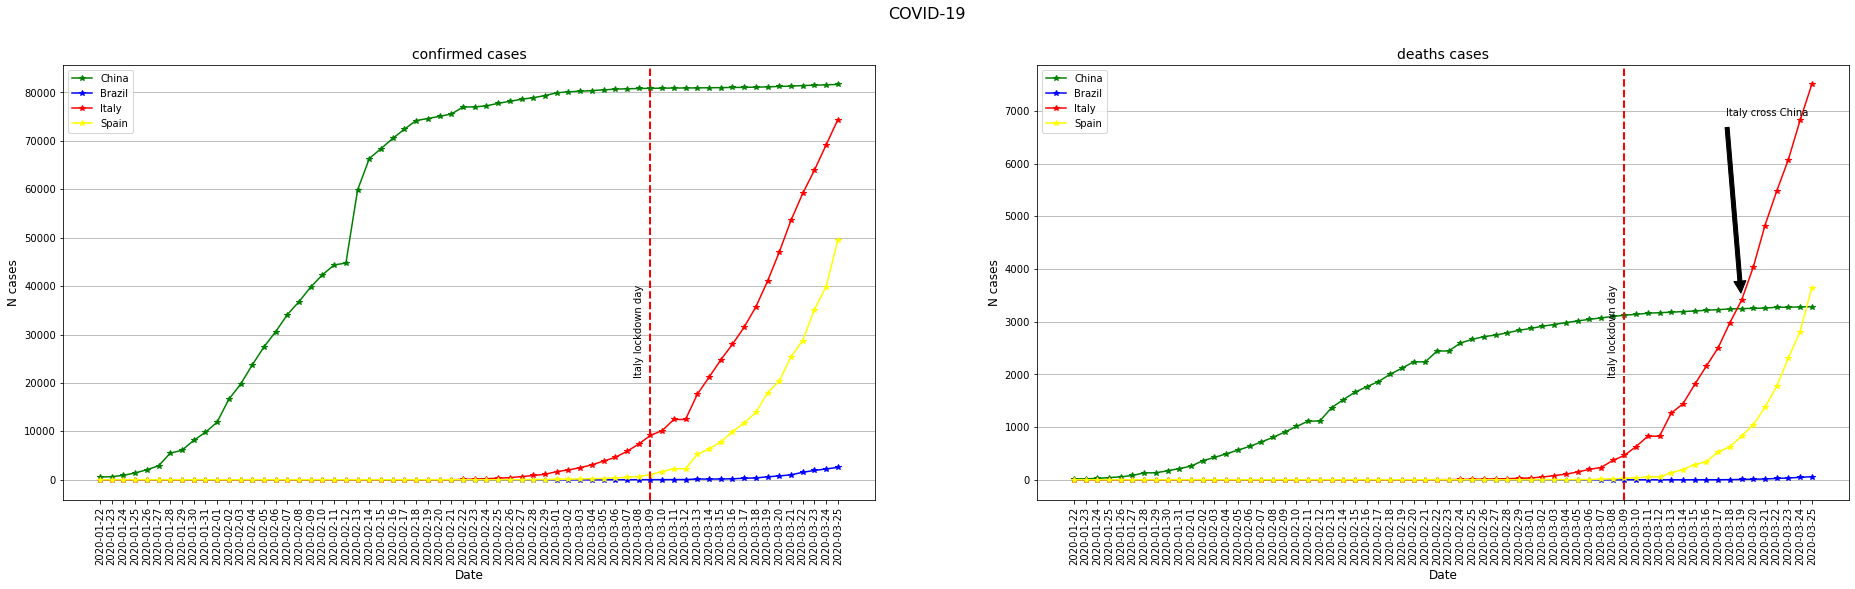

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(32, 8))

for i, type_ in enumerate(['confirmed', 'deaths']):
    ax[i].plot(china[china['type'] == type_]['datetime'], china[china['type'] == type_]['history'], marker='*', label='China', color='green')
    ax[i].plot(brazil[brazil['type'] == type_]['datetime'], brazil[brazil['type'] == type_]['history'], marker='*', label='Brazil', color='blue')
    ax[i].plot(italy[italy['type'] == type_]['datetime'], italy[italy['type'] == type_]['history'], marker='*', label='Italy', color='red')
    ax[i].plot(spain[spain['type'] == type_]['datetime'], spain[spain['type'] == type_]['history'], marker='*', label='Spain', color='yellow')

    ax[i].set_title(f'{type_} cases', fontsize=14)
    ax[i].set_ylabel('N cases', fontsize=12)
    ax[i].set_xticklabels(dates, rotation=90)
    ax[i].set_xlabel('Date', fontsize=12)
    ax[i].axvline(x='2020-03-09', linestyle='--', linewidth=2, color='r')
    ax[i].text('2020-03-08', ax[i].get_ylim()[1]//4, 'Italy lockdown day', rotation=90, fontsize=10, horizontalalignment='center', multialignment='center')
    
    if type_ == 'deaths':
        ax[i].annotate('Italy cross China', ('2020-03-19', italy[(italy['type'] == 'deaths') & (italy['datetime'] == '2020-03-19')]['history'].values[0]),
                xytext=(0.9, 0.9), textcoords='axes fraction',
                arrowprops=dict(facecolor='black', shrink=0.04),
                fontsize=10,
                horizontalalignment='center', verticalalignment='top')

    ax[i].grid(axis='y')
    ax[i].legend()

fig.suptitle('COVID-19', fontsize=16)
plt.show()

We can see in the figure above that when the Italy declared the lockdown the confirmed and deaths cases still arise.

### Logarithmic Scale

Applying the same plot above but in a logarithmic scale.

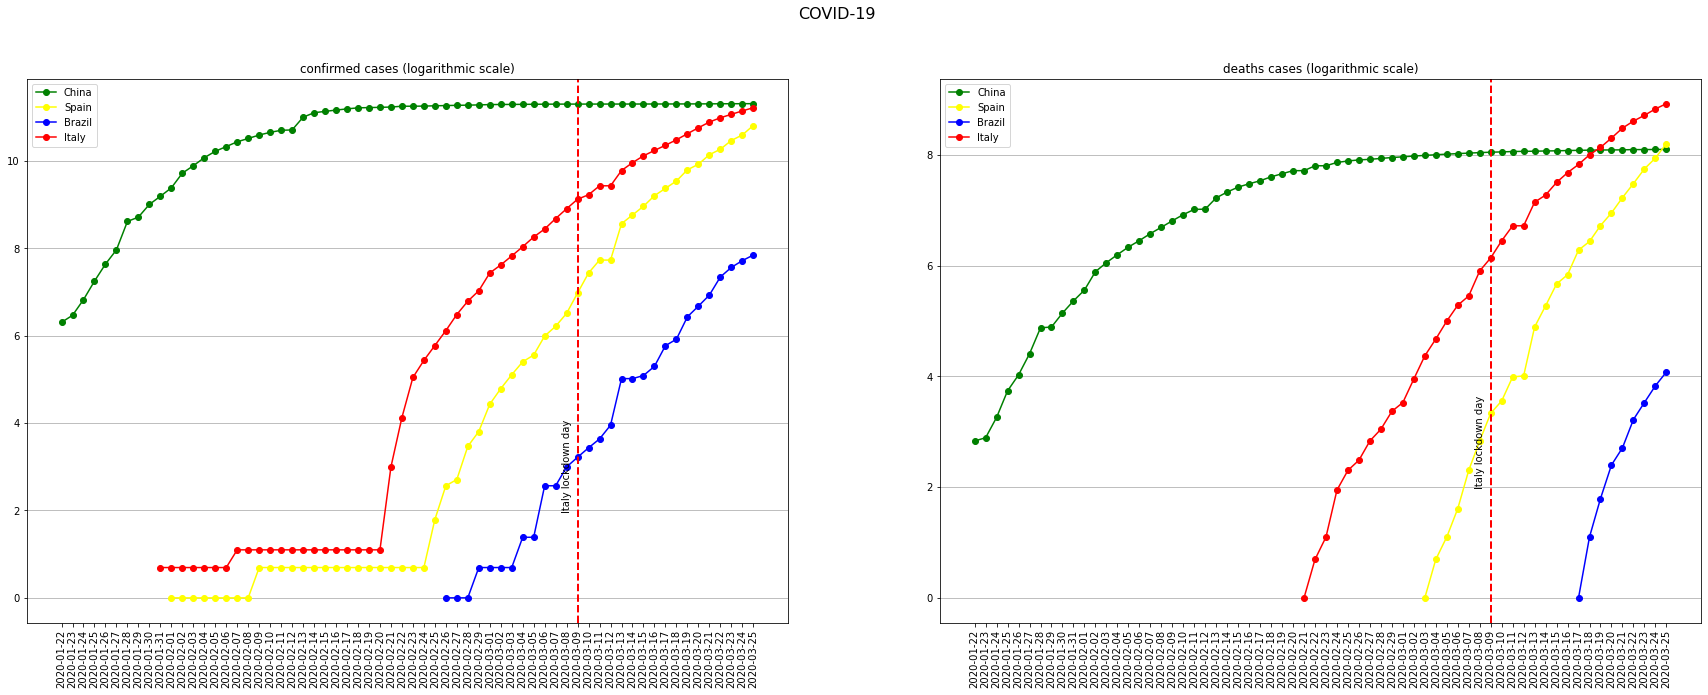

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 10))

for i, type_ in enumerate(['confirmed', 'deaths']):
    ax[i].plot(china[china['type'] == type_]['datetime'], china[china['type'] == type_]['history_log'], '-o', label='China', color='green')
    ax[i].plot(spain[spain['type'] == type_]['datetime'], spain[spain['type'] == type_]['history_log'], '-o', label='Spain', color='yellow')
    ax[i].plot(brazil[brazil['type'] == type_]['datetime'], brazil[brazil['type'] == type_]['history_log'], '-o', label='Brazil', color='blue')
    ax[i].plot(italy[italy['type'] == type_]['datetime'], italy[italy['type'] == type_]['history_log'], '-o', label='Italy', color='red')

    ax[i].set_title(f'{type_} cases (logarithmic scale)')
    ax[i].set_xticklabels(dates, rotation=90)
    ax[i].axvline(x='2020-03-09', linestyle='--', linewidth=2, color='r')
    ax[i].text('2020-03-08', ax[i].get_ylim()[1]//4, 'Italy lockdown day', rotation=90, fontsize=10, horizontalalignment='center', multialignment='center')
    ax[i].grid(axis='y')
    ax[i].legend()

fig.suptitle('COVID-19', fontsize=16)
plt.show()

## Europe cases

In [12]:
portugal = data[data['country'] == 'Portugal'].sort_values(by=['datetime'])
france = data[data['country'] == 'France'].sort_values(by=['datetime']).groupby(by=['type', 'datetime']).sum().reset_index().sort_values(by=['datetime'])
germany = data[data['country'] == 'Germany'].sort_values(by=['datetime'])
united_kingdown = data[data['country'] == 'United Kingdom'].groupby(by=['type', 'datetime']).sum().reset_index().sort_values(by=['datetime'])
netherlands = data[data['country'] == 'Netherlands'].groupby(by=['type', 'datetime']).sum().reset_index().sort_values(by=['datetime'])

In [13]:
france['history_log'] = france['history'].apply(lambda history: np.log(history))
united_kingdown['history_log'] = united_kingdown['history'].apply(lambda history: np.log(history))
netherlands['history_log'] = netherlands['history'].apply(lambda history: np.log(history))

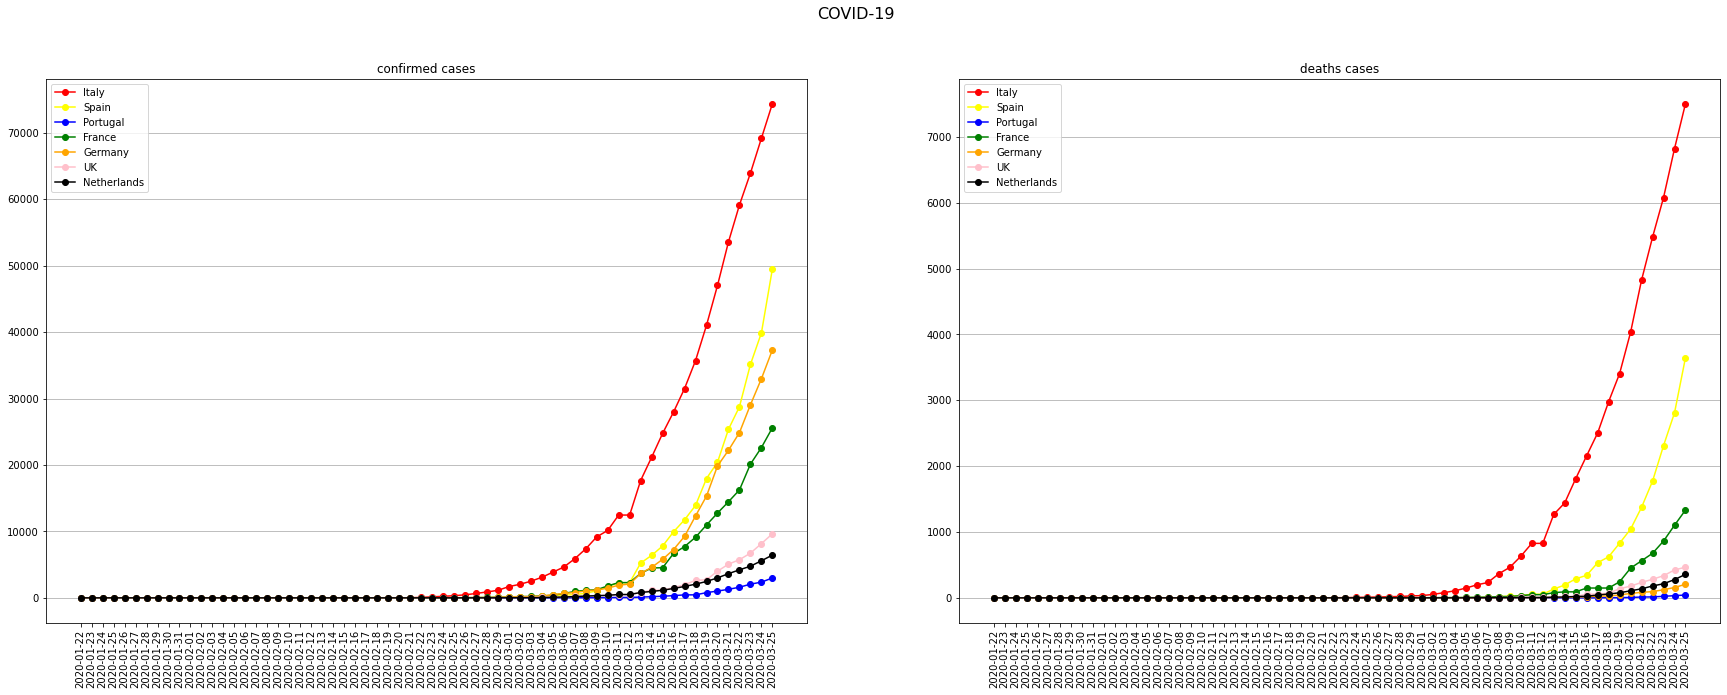

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 10))

for i, type_ in enumerate(['confirmed', 'deaths']):
    ax[i].plot(italy[italy['type'] == type_]['datetime'], italy[italy['type'] == type_]['history'], '-o', label='Italy', color='red')
    ax[i].plot(spain[spain['type'] == type_]['datetime'], spain[spain['type'] == type_]['history'], '-o', label='Spain', color='yellow')
    ax[i].plot(portugal[portugal['type'] == type_]['datetime'], portugal[portugal['type'] == type_]['history'], '-o', label='Portugal', color='blue')
    ax[i].plot(france[france['type'] == type_]['datetime'], france[france['type'] == type_]['history'], '-o', label='France', color='green')
    ax[i].plot(germany[germany['type'] == type_]['datetime'], germany[germany['type'] == type_]['history'], '-o', label='Germany', color='orange')
    ax[i].plot(united_kingdown[united_kingdown['type'] == type_]['datetime'], united_kingdown[united_kingdown['type'] == type_]['history'], '-o', label='UK', color='pink')
    ax[i].plot(netherlands[netherlands['type'] == type_]['datetime'], netherlands[netherlands['type'] == type_]['history'], '-o', label='Netherlands', color='black')

    ax[i].set_title(f'{type_} cases')
    ax[i].set_xticklabels(dates, rotation=90)
    ax[i].grid(axis='y')
    ax[i].legend()

fig.suptitle('COVID-19', fontsize=16)
plt.show()

### Logarithmic Scale

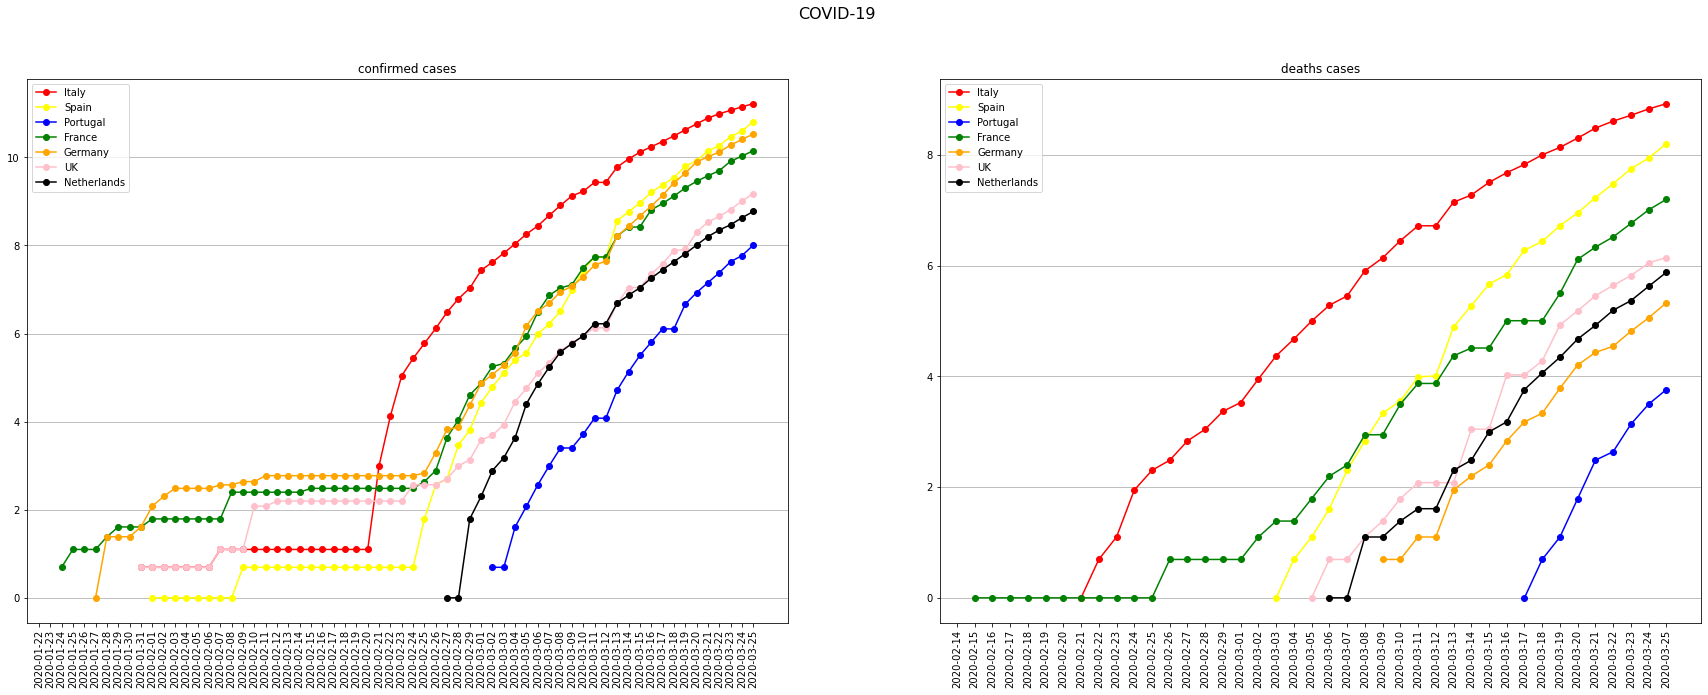

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 10))

for i, type_ in enumerate(['confirmed', 'deaths']):
    ax[i].plot(italy[italy['type'] == type_]['datetime'], italy[italy['type'] == type_]['history_log'], '-o', label='Italy', color='red')
    ax[i].plot(spain[spain['type'] == type_]['datetime'], spain[spain['type'] == type_]['history_log'], '-o', label='Spain', color='yellow')
    ax[i].plot(portugal[portugal['type'] == type_]['datetime'], portugal[portugal['type'] == type_]['history_log'], '-o', label='Portugal', color='blue')
    ax[i].plot(france[france['type'] == type_]['datetime'], france[france['type'] == type_]['history_log'], '-o', label='France', color='green')
    ax[i].plot(germany[germany['type'] == type_]['datetime'], germany[germany['type'] == type_]['history_log'], '-o', label='Germany', color='orange')
    ax[i].plot(united_kingdown[united_kingdown['type'] == type_]['datetime'], united_kingdown[united_kingdown['type'] == type_]['history_log'], '-o', label='UK', color='pink')
    ax[i].plot(netherlands[netherlands['type'] == type_]['datetime'], netherlands[netherlands['type'] == type_]['history_log'], '-o', label='Netherlands', color='black')

    ax[i].set_title(f'{type_} cases')
    ax[i].set_xticklabels(dates, rotation=90)
    ax[i].grid(axis='y')
    ax[i].legend()

fig.suptitle('COVID-19', fontsize=16)
plt.show()

## Plot by Geopraphic Countries

In [16]:
import plotly.graph_objects as go
import plotly.offline as plty

In [17]:
data[(data['country'] == 'US') & (data['type'] == 'confirmed')]['latest'].unique().sum()

65778

In [18]:
confirmed = []
for code, country in zip(data['country_code'].unique(), data['country'].unique()):
    confirmed.append({
        "country_code": code,
        "country": country,
        "n_cases": data[(data['country'] == country) & (data['type'] == 'confirmed')]['latest'].unique().sum()
    })

In [19]:
confirmed = pd.DataFrame.from_dict(confirmed)

In [20]:
countries = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
confirmed = confirmed.merge(countries, how='inner', left_on='country', right_on='COUNTRY')
confirmed.drop(columns=['GDP (BILLIONS)'], inplace=True)

### Applying a Standartization

In [21]:
_max = confirmed['n_cases'].max()
_min = confirmed['n_cases'].min()
confirmed['n_cases_norm'] = confirmed['n_cases'].apply(lambda value: (value - _min)/(_max - _min) )

In [22]:
confirmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  161 non-null    object 
 1   country       162 non-null    object 
 2   n_cases       162 non-null    int64  
 3   COUNTRY       162 non-null    object 
 4   CODE          162 non-null    object 
 5   n_cases_norm  162 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 8.9+ KB


In [23]:
fig = go.Figure(
        go.Choropleth(
            locations = confirmed['CODE'],
            z = confirmed['n_cases_norm'],
            text = confirmed['country'],
            colorscale = 'Blues',
            autocolorscale=False,
            reversescale=False,
            marker_line_color='darkgray',
            marker_line_width=0.5,
            colorbar_tickprefix = '',
            colorbar_title = 'Confirmed Cases <br>'
    )
)

In [24]:
fig.update_layout(
    title_text='Covid-19 Global Cases',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    autosize=True,
    width=1500,
    height=800,
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
            CIA World Factbook</a>',
        showarrow = False
    )]
)

fig.show()